# TASK 1
## IRIS FLOWER CLASSIFICATION USING MACHINE LEARNING

## The goal is to classify Iris flowers into one of three species :
###  1. Setosa
###  2. Versicolor
###  3. Virginica

### Based on four features :
#### * Sepal Length
#### * Sepal Width
#### * Petal Length
#### * Petal Width

## Technologies used :
### 1. numpy and pandas ____ Data handling
### 2. matplotlib and  seaborn ____ Data visualization
### 3. scikit-learn ____ Machine Learning

## _Importing all necessary libraries that are required_

In [6]:
import pandas as pd                                              
import numpy as np                                              
import matplotlib.pyplot as plt                                 
import seaborn as sns                                            
from sklearn.model_selection import train_test_split             
from sklearn.preprocessing import LabelEncoder                   
from sklearn.ensemble import RandomForestClassifier              
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## _Loading the dataset from path_

In [8]:
file_path = r"C:\Users\Sruthi\Documents\Iris.csv"
df = pd.read_csv(file_path)

## _Displaying first few rows of dataset_

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## _Checking for missing values_

In [15]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
df.drop(columns=["Id"], inplace=True)

## _Encoding the categorical target column i.e, 'Species' by using LableEncoder_

In [20]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

## _Splitting data into feature variable and target variable_

In [23]:
feature = df.drop(columns=['Species'])  
target = df['Species'] 

## _Training and Testing by using train_test_split_

In [26]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)

## _Train the model by using RandomForestClassifier_

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(feature_train, target_train)

RandomForestClassifier(random_state=42)

In [31]:
target_pred = model.predict(feature_test)

## _Evaluating model performance by using accuracy_score, confusion_matrix, classification_report_

In [34]:
accuracy = accuracy_score(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)
class_report = classification_report(target_test, target_pred)

In [36]:
accuracy

1.0

In [38]:
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [40]:
class_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

## _Data Visualization using Seaborn_

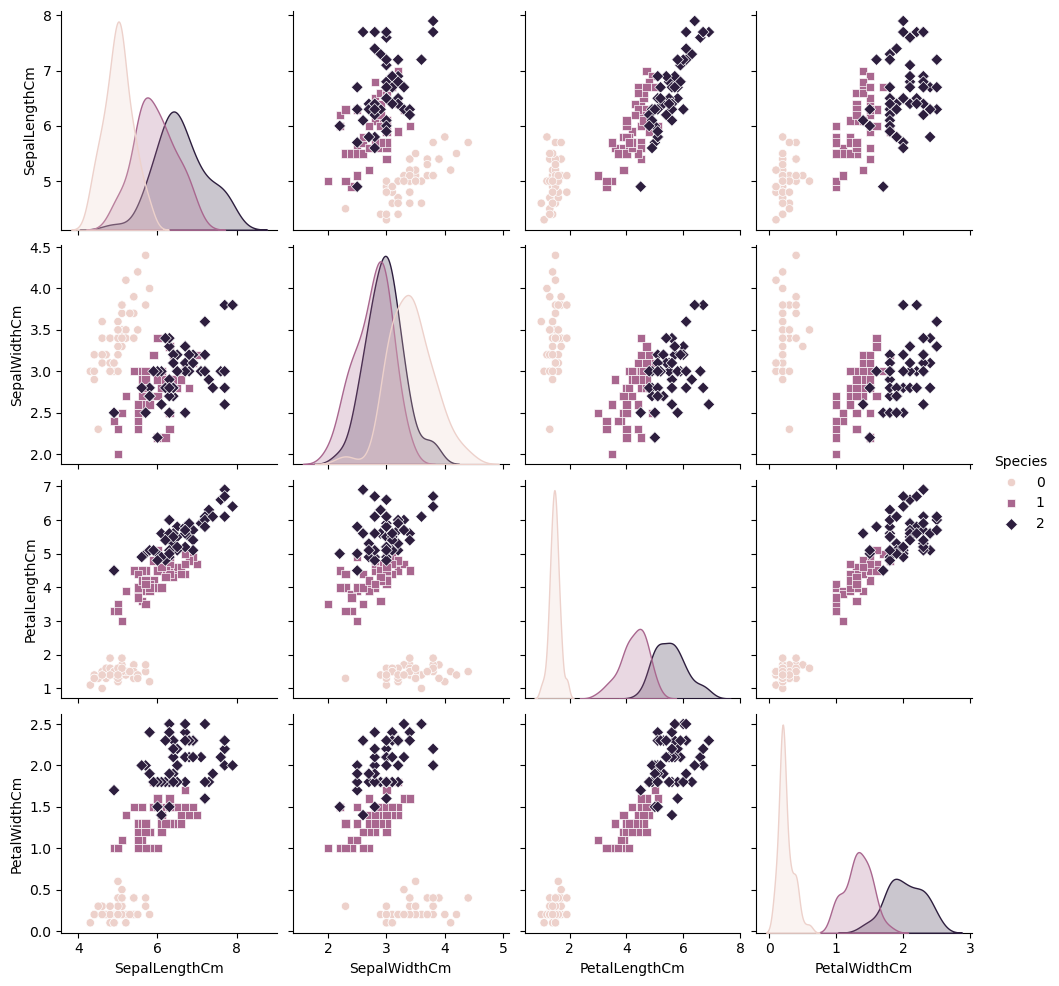

In [43]:
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.show()

## _Plotting the feature importance_

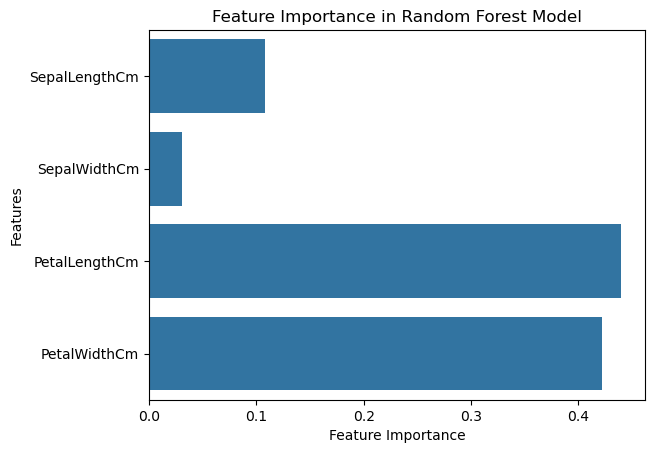

In [45]:
feature_importances = model.feature_importances_
sns.barplot(x=feature_importances, y=feature.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()